# Prepare rules for the dataset
- **Try different values of support and confidence. Observe the change in number of rules for different support,confidence values**
- **Change the minimum length in apriori algorithm**
- **Visulize the obtained rules using different plots**
___

Association rule learning is used to find interesting relationships between items in large datasets. One application of this learning is for Market Basket Analysis, where the goal is to find out shopping patterns for items bought which informs us on product placement and discount rates to optimize sale and profit. Some metrics used to evaluate the quality and relevance of association rules include support, confidence, lift, leverage, and conviction.

- Support: Support is the percentage of transactions in the dataset that contain both the antecedent and the consequent. It measures the frequency of occurrence of the rule in the dataset. Higher support values indicate that the rule is more frequently occurring and thus, more important.

- Confidence: Confidence is the percentage of transactions containing the antecedent that also contain the consequent. It measures the strength of the relationship between the antecedent and the consequent. Higher confidence values indicate that the rule is more reliable.

- Lift: Lift is defined as the ratio of the observed support of the two items occurring together to the expected support if they were independent of each other. It compares the likelihood of two items co-occurring together to the likelihood of them occurring separately. A lift value greater than 1 indicates a positive correlation, a value less than 1 indicates a negative correlation, and a value equal to 1 indicates independence.

- Leverage: Like Lift, Leverage quantifies the difference between the observed support of two items occurring together and the expected support if they were independent of each other. It provides a measure of how much the occurrence of one item influences the occurrence of another item. A leverage value greater than 0 indicates a positive correlation, a value less than 0 indicates a negative correlation, and a value equal to 0 indicates independence. Leverage is a stricter measure of association than lift. Leverage helps identify rare and meaningful relationships, while lift helps identify frequent and interesting ones.

- Conviction: Conviction can be interpreted as the ratio of the expected frequency of incorrect predictions made by the rule to the actual frequency of incorrect predictions. It measures the degree of dependence between the antecedent and the negation of the consequent. Higher conviction values indicate that the rule is more interesting and thus, more valuable.

## Exploratory Data Analysis

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset
movies = pd.read_csv('my_movies.csv')
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


We have unprocessed data and the processed data has been concatenated to it. We will consider only the processed data for learning

In [4]:
# Filtering out the unprocessed data
movies = movies.loc[:, 'Sixth Sense':'Green Mile']
movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [5]:
# Checking shape of the data
movies.shape

(10, 10)

We have a 10 by 10 matrix for 10 movies and 10 transactions. LOTR, LOTR1, LOTR2 belong to a film series, so do Harry Potter1 and Harry Potter2 to another. We would expect them to have high lift

## Association Rule Learning

- As we want to check number of rules for different support and confidence values, let us run apriori algorithm, with the least support possible, which is 0.1 
- We also want to check the effect of changing the minimum length of the itemset. For now, we will let it be None which means all lengths are allowed

In [6]:
# Using Apriori Algorithm to get all itemsets above the minimum support of 1 transaction
ap = apriori(movies, use_colnames=True, min_support= 0.1)

In [7]:
# Using association_rules function to get all association rules from the itemsets generated by apriori.
# The default metric is 'confidence'. Let's set its minimum threshold to 0
rules = association_rules(ap, min_threshold = 0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR1),"(Sixth Sense, LOTR2, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Green Mile),"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [8]:
# Getting total number of rules
rules.shape[0]

250

We have 250 total possible rules for the lowest values of support and confidence

In [9]:
# Getting features of the rules
rules.columns

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction'],
      dtype='object')

In [10]:
# Defining a function that returns rules with the passed support and confidence levels or higher

def get_rules(support_threshold, confidence_threshold):
    # returns rules that comply with the given minimum support and confidence thresholds
    return rules[(rules.support >= support_threshold) & (rules.confidence >= confidence_threshold)]

We have support and confidence of each rule. We will use filters to get the rules for our desired support and confidence

In [11]:
# Rules with minimum 10% support
get_rules(0.1, 0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(LOTR2),"(Sixth Sense, LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR1),"(Sixth Sense, LOTR2, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(LOTR2, LOTR1, Harry Potter1, Green Mile)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Green Mile),"(Sixth Sense, LOTR2, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


All rules have been generated, which means 0.1 is the minimum value for support

In [12]:
# Finding the maximum support value
max_support = 10 * rules.support.max()

In [13]:
# Finding the maximum confidence value
max_confidence = rules.confidence.max()

In [14]:
# Setting range for support and confidence values
supports = np.arange(1,max_support + 1)
confidences = np.linspace(0,max_confidence,1001)

# creating meshgrid from support and confidence values
X, Y = np.meshgrid(supports, confidences)

# creating a dataframe of number of rules of all support and confidence values replicating the shape of the meshgrid
# and replacing 0 with np.nan to stop it from being plotted
n_rules = pd.DataFrame([[get_rules(support/10, confidence).shape[0] for support in supports] for confidence in confidences])
n_rules.replace({0:np.nan}, inplace = True)

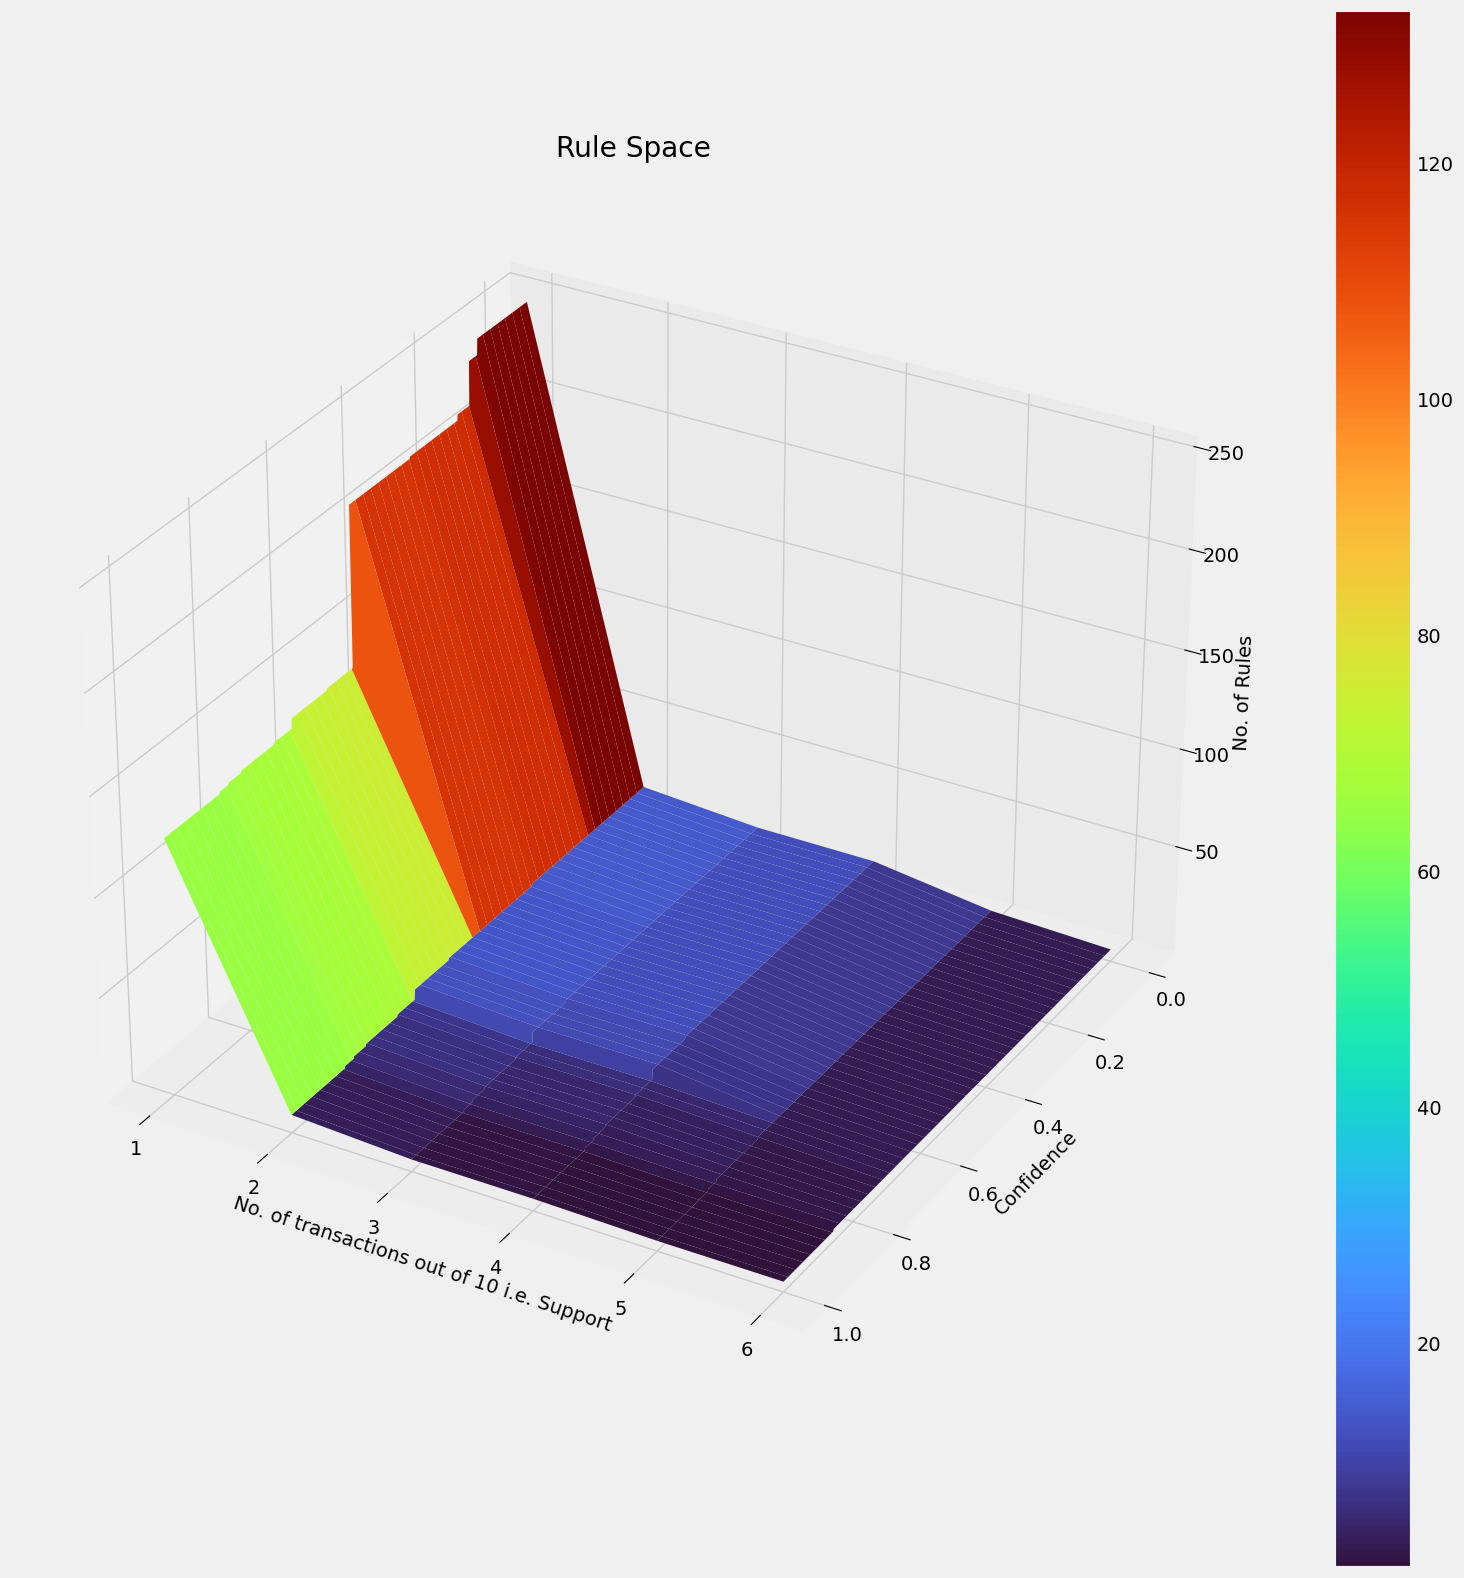

In [15]:
# Plotting 3d surface graph for number of rules for all support and confidence values
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, n_rules, cmap = 'turbo')
cbar = plt.colorbar(surf)
ax.set_xlabel('No. of transactions out of 10 i.e. Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('No. of Rules')
ax.set_title('Rule Space')
ax.invert_yaxis()
plt.tight_layout()
plt.show()

As we have only 6 distinct values of support to analyze, it is quite easy to understand this graph. For support 0.1, we get the highest number of rules possible for 0 confidence. As the confidence increases, the number of rules decreases to about half of the highest value. For support 0.2, the number of rules drops drastically to less than 50 for 0 confidence and stays the same for upto 60% confidence, then keeps droping until we reach 100% confidence. 0.3 and 0.4 support are have similar count to 0.2. 0.5 and 0.6 have very low count for all confidence values

As we have very few rules, a surface plot is not as accurate in understanding the distribution

In [16]:
# Generating a list of number of rules for unique support and confidence values

x = []
y = []
z = []
# Unique support values
sup = [0.1,0.2,0.4,0.5,0.6]
# Unique confidence values
conf = [0.142857,0.166667,0.200000,0.333333,0.500000,0.571429,0.666667,0.714286,0.800000,0.833333,0.857143,1.000000]
# Iteratively getting the number of rules for every combination of unique support and confidence values only if at least 1 rule is generated
for s in sup:
    for c in conf:
        r = get_rules(s,c)
        nr = r.shape[0]
        if nr != 0:
            x.append(s)
            y.append(c)
            z.append(nr)

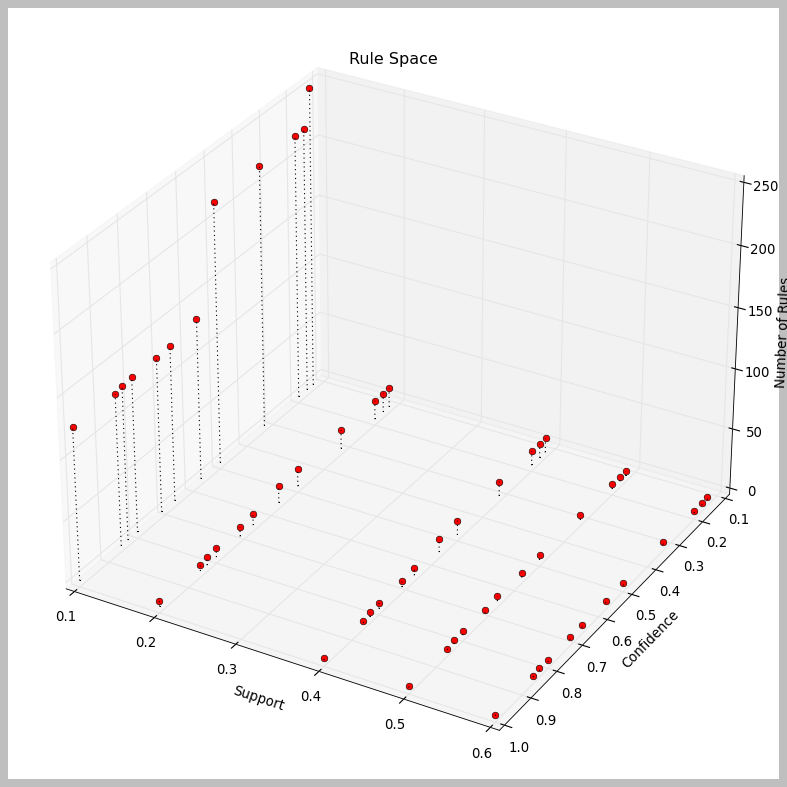

In [18]:
# Stem plot for every support, confidence pair that generates rules

# Applying 'classic' style for a very bare, low-key graph
plt.style.use('classic')
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (10,10))
ax.stem(x, y, z, linefmt = 'C6:', markerfmt = 'C9o', basefmt = 'C6,')
ax.invert_yaxis()
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Number of Rules")
ax.set_title('Rule Space')
plt.tight_layout()
plt.show()

This gives us a better understand of the rule count space. However, the rules for 0.1 support are skewing the data. Let us try again without them : 

In [19]:
x = []
y = []
z = []
sup = [0.2,0.4,0.5,0.6]
conf = [0.142857,0.166667,0.200000,0.333333,0.500000,0.571429,0.666667,0.714286,0.800000,0.833333,0.857143,1.000000]
for s in sup:
    for c in conf:
        r = get_rules(s,c)
        nr = r.shape[0]
        if nr != 0:
            x.append(s)
            y.append(c)
            z.append(nr)

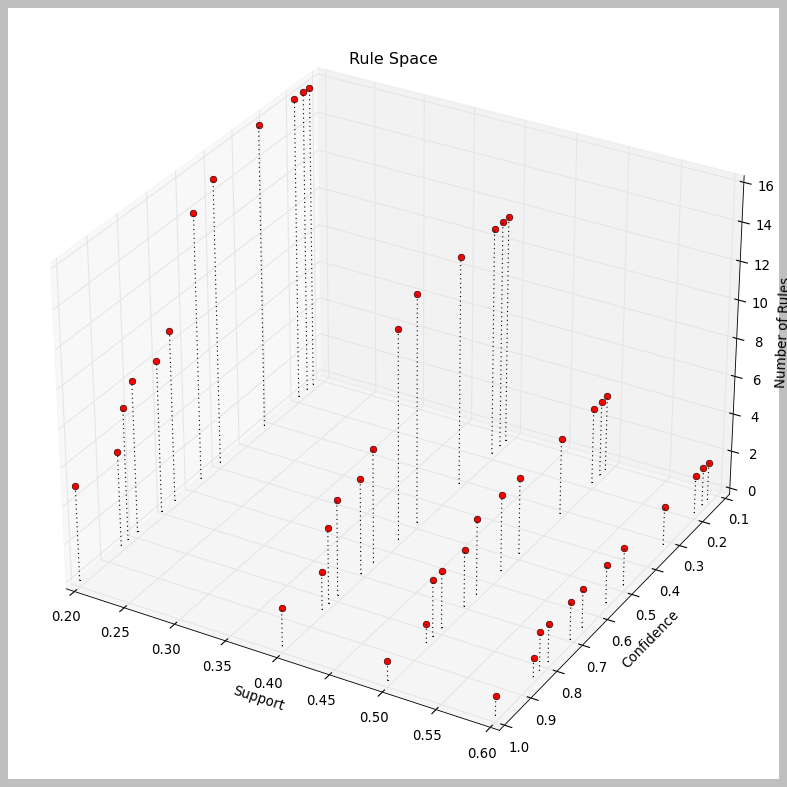

In [21]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize = (10,10))
ax.stem(x, y, z, linefmt = 'C6:', markerfmt = 'C9o', basefmt = 'C6,')
ax.invert_yaxis()
ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Number of Rules")
ax.set_title('Rule Space')
plt.tight_layout()
plt.show()

Here the count for each support, confidence pair is clearly visible for smaller counts. For each support level, the count is higher for low confidence and drops as confidence increases

## For 60% Support

In [22]:
get_rules(0.6, 0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
15,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


If a customer buys Patriot, they definitely buy Gladiator as this rule has 100% confidence. Vice-verse has 85% confidence. Lift for both rules is good too

## For 50% Support

In [23]:
rules[(rules.support == 0.5) & (rules.confidence >= 0)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4


We get two more rules for 50% support for Sixth Sense and Gladiator with 71 and 85% confidence

## For 40% Support

In [24]:
s40 = rules[(rules.support == 0.4) & (rules.confidence > 0)].sort_values('confidence', ascending=False)
s40

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
40,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
41,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
42,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
43,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
44,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5
45,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4


<Axes: xlabel='support', ylabel='confidence'>

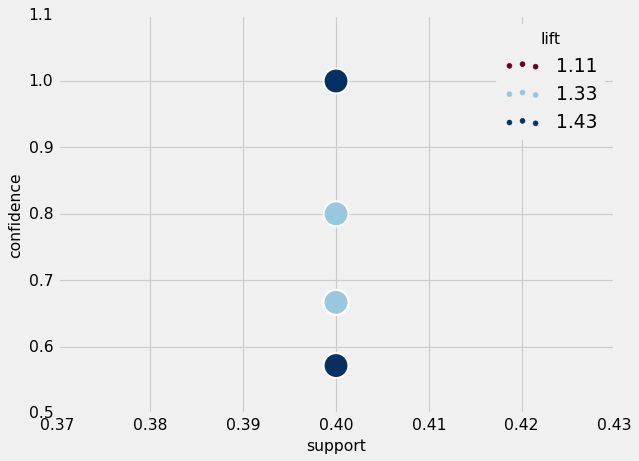

In [25]:
# Setting style 'fivethirtyeight' for better visuals 
plt.style.use('fivethirtyeight')

# Scatterplot of rules with 40% support
sns.scatterplot(x = s40['support'], y = s40['confidence'], hue = np.round(s40['lift'],2), palette = 'RdBu', s = 500)

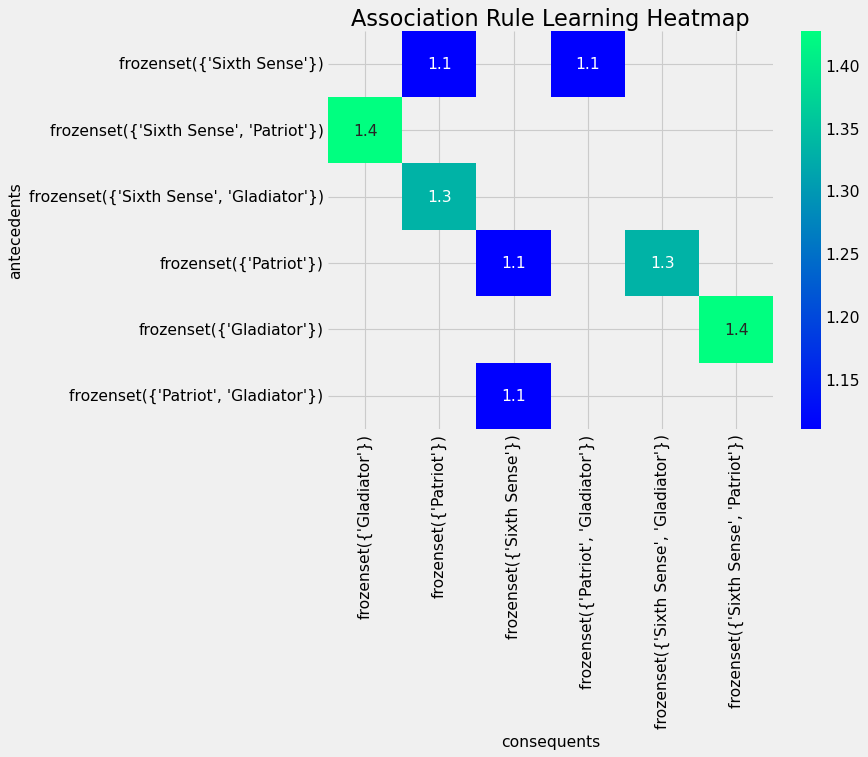

In [26]:
# Heatmap of rules with 40% support

matrix = s40.pivot_table(index='antecedents', columns='consequents', values='lift')
sns.heatmap(matrix, cmap='winter', annot=True)
plt.title('Association Rule Learning Heatmap')
plt.show()

## For 20% Support

In [27]:
s20 = rules[(rules.support == 0.2) & (rules.confidence > 0)].sort_values('confidence', ascending=False)
s20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


<Axes: xlabel='support', ylabel='confidence'>

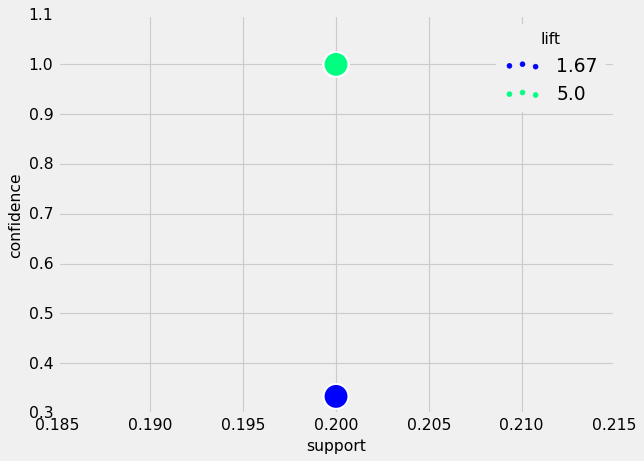

In [28]:
# Scatterplot of rules with 20% support
sns.scatterplot(x = s20['support'], y = s20['confidence'], hue = np.round(s20['lift'],2), palette = 'winter', s = 500)

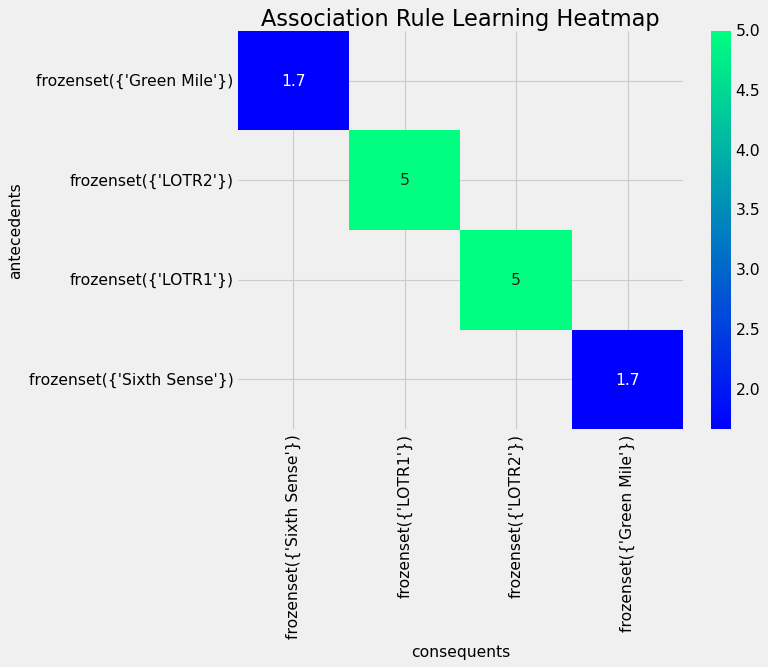

In [29]:
# Heatmap of rules with 20% support
matrix = s20.pivot_table(index='antecedents', columns='consequents', values='lift')
sns.heatmap(matrix, cmap='winter', annot=True)
plt.title('Association Rule Learning Heatmap')
plt.show()

## For 10% Support

We will ignore this as it corresponds to only 1 transcation, and we do not want to give consideration to a singular orrurance

## Effect of different Maximum Length on Rule Learning

Text(0.5, 1.0, "Effect of 'max_len' hyperparameter on number of rules generated")

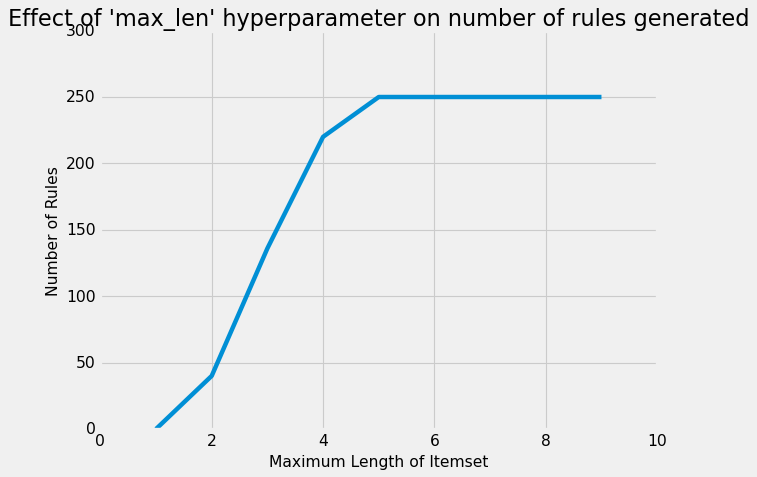

In [30]:
# Plotting change in number of rules as maximum length of itemset increases
n_rules = []
for i in range(1,10):
    ap = apriori(movies, use_colnames=True, min_support= 0.1, max_len = i)
    rules = association_rules(ap, min_threshold = 0)
    n_rules.append(rules.shape[0])
plt.plot(list(range(1,10)), n_rules)
plt.ylim(0, 300)
plt.xlim(0, 10)
plt.xlabel('Maximum Length of Itemset')
plt.ylabel("Number of Rules")
plt.title("Effect of 'max_len' hyperparameter on number of rules generated")

The number of rules keeps increasing from maximum length of itemset of 2 upto 5, then stays the same. This is because, ss you can see in the original unprocessed dataset, 5 is the maximum number of movies purchased.

<Axes: xlabel='support', ylabel='confidence'>

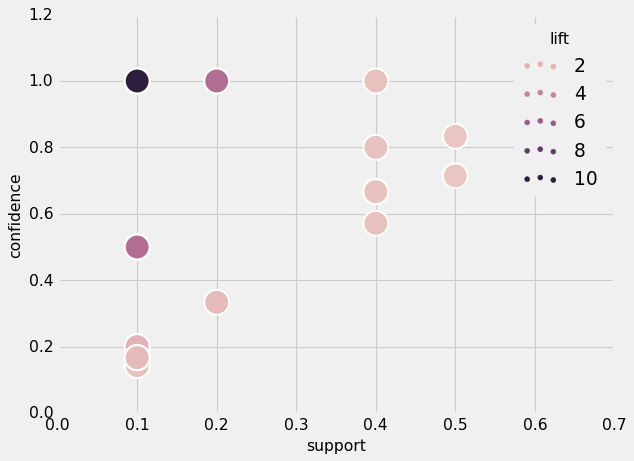

In [31]:
# Scatterplot for all rules
ap = apriori(movies, use_colnames=True, min_support= 0.1)
rules = association_rules(ap, min_threshold = 0)
sns.scatterplot(rules, x = 'support', y = 'confidence', hue = 'lift', cmap = 'autumn', s = 500)